In [53]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

In [55]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [57]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [60]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [61]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [62]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [63]:
print(f"Data is from {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

Data is from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [64]:
# Compute RFM metrics
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [119]:
# Create a new dataframe with customer-level data
customers = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
})

In [120]:
# Rename columns
customers.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'MonetaryValue'
}, inplace=True)

In [121]:
customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [122]:
# Define labels for the quantiles
quantiles = ['1', '2', '3', '4', '5']

# Assign quantile labels to the RFM metrics
customers['RecencyScore'] = pd.qcut(customers['Recency'], q=5, labels=quantiles)
customers['FrequencyScore'] = pd.qcut(customers['Frequency'], q=5, labels=quantiles)
customers['MonetaryScore'] = pd.qcut(customers['MonetaryValue'], q=5, labels=quantiles)

In [123]:
customers

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.0,326,2,0.00,5,1,1
12347.0,2,182,4310.00,1,5,5
12348.0,75,31,1797.24,4,3,4
12349.0,19,73,1757.55,2,4,4
12350.0,310,17,334.40,5,2,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,5,1,1
18281.0,181,7,80.82,5,1,1
18282.0,8,13,176.60,1,1,1


In [124]:
# Convert RFM scores to numeric values
customers['RecencyScore'] = customers['RecencyScore'].astype(int)
customers['FrequencyScore'] = customers['FrequencyScore'].astype(int)
customers['MonetaryScore'] = customers['MonetaryScore'].astype(int)

In [125]:
customers

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.0,326,2,0.00,5,1,1
12347.0,2,182,4310.00,1,5,5
12348.0,75,31,1797.24,4,3,4
12349.0,19,73,1757.55,2,4,4
12350.0,310,17,334.40,5,2,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,5,1,1
18281.0,181,7,80.82,5,1,1
18282.0,8,13,176.60,1,1,1


In [127]:
# Compute the RFM score based on the formula
customers['RFM_Score'] = 0.15 * customers['RecencyScore'] + 0.28 * customers['FrequencyScore'] + 0.57 * customers['MonetaryScore']

In [128]:
customers

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
CustomerID,,,,,,,
12346.0,326,2,0.00,5,1,1,1.60
12347.0,2,182,4310.00,1,5,5,4.40
12348.0,75,31,1797.24,4,3,4,3.72
12349.0,19,73,1757.55,2,4,4,3.70
12350.0,310,17,334.40,5,2,2,2.45
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,5,1,1,1.60
18281.0,181,7,80.82,5,1,1,1.60
18282.0,8,13,176.60,1,1,1,1.00


In [129]:
def segment_customer(rfm):
    if rfm['RFM_Score'] >= 4.5:
        return 'Top Customer'
    elif rfm['RFM_Score'] >= 4 and rfm['RFM_Score'] < 4.5:
        return 'High Value Customer'
    elif rfm['RFM_Score'] >= 3 and rfm['RFM_Score'] < 4:
        return 'Medium Value Customer'
    elif rfm['RFM_Score'] >= 1.6 and rfm['RFM_Score'] < 3:
        return 'Low Value Customer'
    else:
        return 'Lost Customer'

In [130]:
# Add the customer segment column
customers['Customer_Segment'] = customers.apply(segment_customer, axis=1)

In [131]:
customers

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Customer_Segment
CustomerID,,,,,,,,
12346.0,326,2,0.00,5,1,1,1.60,Low Value Customer
12347.0,2,182,4310.00,1,5,5,4.40,High Value Customer
12348.0,75,31,1797.24,4,3,4,3.72,Medium Value Customer
12349.0,19,73,1757.55,2,4,4,3.70,Medium Value Customer
12350.0,310,17,334.40,5,2,2,2.45,Low Value Customer
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,5,1,1,1.60,Low Value Customer
18281.0,181,7,80.82,5,1,1,1.60,Low Value Customer
18282.0,8,13,176.60,1,1,1,1.00,Lost Customer


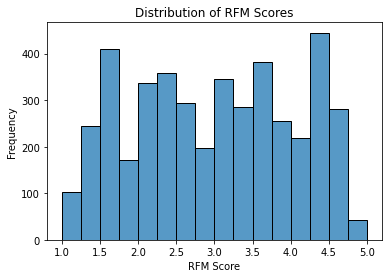

In [132]:
# Plot the distribution of RFM scores
sns.histplot(customers['RFM_Score'], bins=16)
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.show()

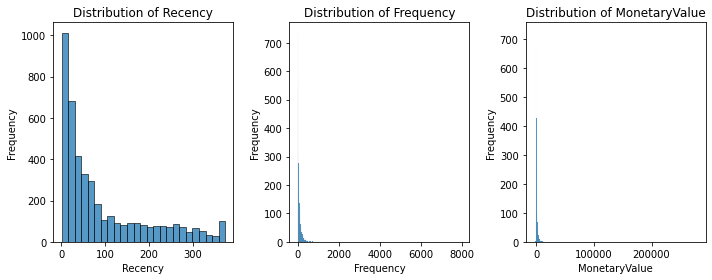

In [133]:
# Plot the distribution of Recency, Frequency, and MonetaryValue
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(customers['Recency'])
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(customers['Frequency'])
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(customers['MonetaryValue'])
plt.title('Distribution of MonetaryValue')
plt.xlabel('MonetaryValue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [136]:
# Compute the size of each RFM segment
rfm_segment_sizes = customers.groupby('Customer_Segment').size().sort_values(ascending=False)

# Compute the average RFM scores for each RFM segment
rfm_segment_agg = customers.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
})
rfm_segment_agg.columns = rfm_segment_agg.columns.droplevel()
rfm_segment_agg = rfm_segment_agg.reset_index()

# Print the RFM segment sizes and average RFM scores
print(rfm_segment_sizes)


Customer_Segment
Low Value Customer       1716
Medium Value Customer    1269
High Value Customer       664
Lost Customer             400
Top Customer              323
dtype: int64


In [137]:
print(rfm_segment_agg)

        Customer_Segment        mean        mean         mean  count
0    High Value Customer   39.579819  266.849398  6876.252139    664
1          Lost Customer   60.122500   10.220000   122.510575    400
2     Low Value Customer  140.429487   26.055361   361.352670   1716
3  Medium Value Customer   74.368794   78.667455  1181.542270   1269
4           Top Customer   51.854489  250.814241  4847.590839    323


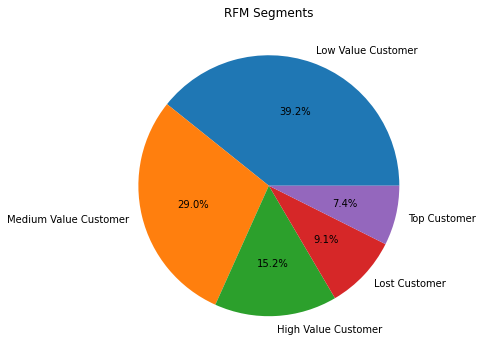

In [138]:
# Plot a pie chart of RFM segments
plt.figure(figsize=(6, 6))
plt.pie(rfm_segment_sizes, labels=rfm_segment_sizes.index, autopct='%1.1f%%')
plt.title('RFM Segments')
plt.show()


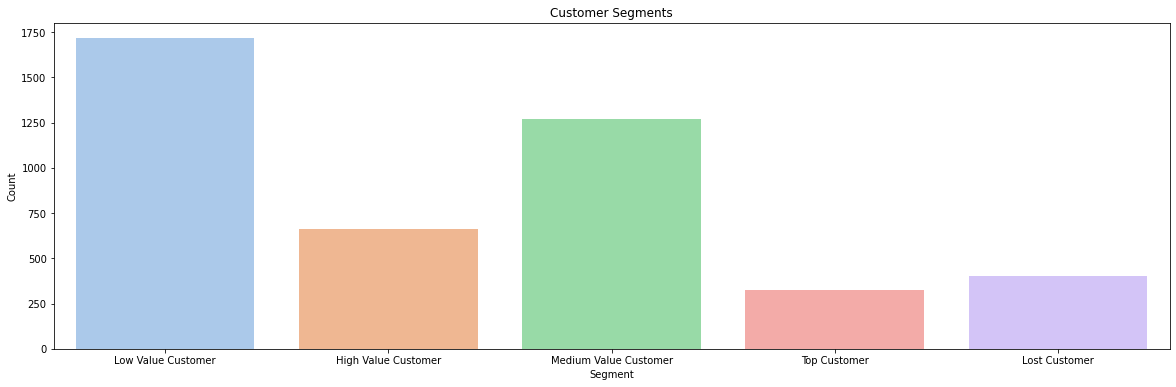

In [145]:
# Visualize the customer segments
plt.figure(figsize=(20, 6))
sns.countplot(x='Customer_Segment', data=customers)
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()
